In [75]:
### IMPORT LIBRARIES ###
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

In [173]:
### IMPORT DATASET ###
data = pd.read_csv(r'C:\Users\sofia\My Drive\Code\Python\PokemonTCG\ParadoxRift_data.csv')

#print(data)

dfC = data[data['Rarity'] == 'C']
dfU = data[data['Rarity'] == 'U']
dfR = data[data['Rarity'] == 'R']
dfDR = data[data['Rarity'] == 'DR']
dfUR = data[data['Rarity'] == 'UR']
dfIR = data[data['Rarity'] == 'IR']
dfSIR = data[data['Rarity'] == 'SIR']
dfHR = data[data['Rarity'] == 'HR']
print(dfC.shape[0], dfU.shape[0], dfR.shape[0], dfDR.shape[0], dfUR.shape[0], dfIR.shape[0], dfSIR.shape[0], dfHR.shape[0])

maxIOS = 4*10

# Construct chase list
baseChaseList = []
for i in range(data.shape[0]):
    if data['IOS'].iloc[i] == 4:
        baseChaseList.append(data['Set number'].iloc[i])

# Construct chase list of very rare cards
rareChaseList = []
for i in range(data.shape[0]):
    if data['IOS'].iloc[i] == 5:
        rareChaseList.append(data['Set number'].iloc[i])

80 55 27 20 28 34 15 7


In [174]:
#### BOOSTER SLOT DISTRIBUTION ####
# 1st, 2nd, 3rd, 4th slots = Common
# 5th, 6th, 7th slots = Uncommon
slot8_dist = [4/7, 2/7, 1/7]
slot8_rarities = [dfC, dfU, dfR]
slot9_dist = [32/63, 16/63, 8/63, 4/63, 2/63, 1/63]
slot9_rarities = [dfC, dfU, dfR, dfIR, dfSIR, dfHR]
slot10_dist = [12/15, 2/15, 1/15] 
slot10_rarities = [dfR, dfDR, dfUR]

# For a given distribution of a slot in booster, return random card rarity in slot
def GetSlot(dist, rarities):
    rarity = random.choices(rarities, dist)
    return rarity[0]

#print(GetSlot(slot10_dist, slot10_rarities))

In [175]:
### CONSTRUCT RANDOM BOOSTER ###
def ConstructBooster(data):
    slot1 = dfC.sample(n=1, replace=True)
    slot2 = dfC.sample(n=1, replace=True)
    slot3 = dfC.sample(n=1, replace=True)
    slot4 = dfC.sample(n=1, replace=True)
    
    #print(slot1)
    #print(slot2)
    #print(slot3)
    #print(slot4)
    
    slot5 = dfU.sample(n=1, replace=True)
    slot6 = dfU.sample(n=1, replace=True)
    slot7 = dfU.sample(n=1, replace=True)
    
    #print(slot5)
    #print(slot6)
    #print(slot7)
    
    slot8 = GetSlot(slot8_dist, slot8_rarities).sample(n=1, replace=True)
    slot9 = GetSlot(slot9_dist, slot9_rarities).sample(n=1, replace=True)
    slot10 = GetSlot(slot10_dist, slot10_rarities).sample(n=1, replace=True)
    
    #print(slot8)
    #print(slot9)
    #print(slot10)
    
    booster = pd.concat([slot1, slot2, slot3, slot4, slot5, slot6, slot7, slot8, slot9, slot10])
    #print(booster)
    return booster

booster = ConstructBooster(data)
print(booster)

     Set number     Card name Rarity  Value  IOS  IOS duplicate
100         101         Nacli      C      0    0              0
148         149       Loudred      C      0    0              0
66           67      Oricorio      C      0    0              0
129         130       Honedge      C      0    4              0
149         150       Exploud      U      0    0              0
145         146       Ambipom      U      0    0              0
91           92       Gliscor      U      0    0              0
179         180  Techno Radar      U      0    4              4
15           16     Toedscool      C      0    0              0
48           49     Golisopod      R      0    4              0


In [176]:
### TEST DROP RATES ###
# Experimental: DR (13.33%), UR (6.67%), IR (6.35%), SIR (3.17%), HR (1.59%)

def PrintDropRates(rarity, fbatch, fboosterNumber):
    try:
        counts = fbatch['Rarity'].value_counts()[rarity]
        percentage = counts/fboosterNumber * 100
        print(rarity+':', counts, 'counts', str(percentage)+'%')
    except:
        print('No counts registered for ' + rarity + ' rarity.')

testBatchNumber = 1000
testBoosterBatch = data.copy()
testBoosterBatch = testBoosterBatch.iloc[0:0]

for i in range(testBatchNumber):
    booster = ConstructBooster(data)
    testBoosterBatch = pd.concat([testBoosterBatch, booster])

PrintDropRates('DR', testBoosterBatch, testBatchNumber)
PrintDropRates('UR', testBoosterBatch, testBatchNumber)
PrintDropRates('IR', testBoosterBatch, testBatchNumber)
PrintDropRates('SIR', testBoosterBatch, testBatchNumber)
PrintDropRates('HR', testBoosterBatch, testBatchNumber)

DR: 104 counts 10.4%
UR: 71 counts 7.1%
IR: 59 counts 5.8999999999999995%
SIR: 41 counts 4.1000000000000005%
HR: 17 counts 1.7000000000000002%


In [177]:
### COMPUTE AVERAGE BOOSTER VALUE ###
testBatchNumber = 10000
cardValue = []

for i in range(testBatchNumber):
    booster = ConstructBooster(data)
    cardValue.append(booster['Value'].sum())

averageValue = np.average(cardValue)
print('Average value of the contents of a booster:', str(averageValue) + '€')
print('Min value of the contents of a booster:', str(np.min(cardValue)) + '€')
print('Max value of the contents of a booster:', str(np.max(cardValue)) + '€')

Average value of the contents of a booster: 0.0€
Min value of the contents of a booster: 0€
Max value of the contents of a booster: 0€


In [178]:
### CONSTRUCT RANDOM BOOSTER BATCH ### 
# Calculate IOS for each booster based on individual card IOS and duplicates
# Construct card list
def GetBoosterBatch(boosterNumber, chaseList, rareList):
    cardList = []
    tempChaseList = chaseList.copy()
    tempRareList = rareList.copy()
    IOSList = []
    completionRatio = []
    singleSavings = []
    for i in range(boosterNumber):
        IOS = 0
        singleValue = 0
        booster = ConstructBooster(data)
        for j in range(10):
            # Calculate IOS
            if booster['Set number'].iloc[j] in cardList:
                IOS+=booster['IOS duplicate'].iloc[j]
            else:
                IOS+=booster['IOS'].iloc[j]
                cardList.append(booster['Set number'].iloc[j])
            if booster['Set number'].iloc[j] in tempChaseList:
                tempChaseList.remove(booster['Set number'].iloc[j])
                singleValue += booster['Value'].iloc[j]
            if booster['Set number'].iloc[j] in tempRareList:
                tempRareList.remove(booster['Set number'].iloc[j])
                singleValue += booster['Value'].iloc[j]
            
        IOSList.append(IOS)
        completionRatio.append((len(chaseList)-len(tempChaseList))/len(chaseList))
        singleSavings.append(singleValue)
                
    return IOSList, completionRatio, singleSavings

In [179]:
### RUN X BOOSTER BATCHES ###
# Average IOS over all booster batches
# Track chase card completion

boosterBatch = 100 # number of boosters in batch
batchNumber = 1000 # number of batches
IOSTotal = [0]*boosterBatch
completionTotal = [0]*boosterBatch
singlesTotal = [0]*boosterBatch

for i in range(batchNumber):
    IOSBatch, completionBatch, singlesBatch = GetBoosterBatch(boosterBatch, baseChaseList, rareChaseList)
    IOSTotal = [sum(j) for j in zip(IOSTotal, IOSBatch)] 
    completionTotal = [sum(j) for j in zip(completionTotal, completionBatch)]
    singlesTotal = [sum(j) for j in zip(singlesTotal, singlesBatch)]
    
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900


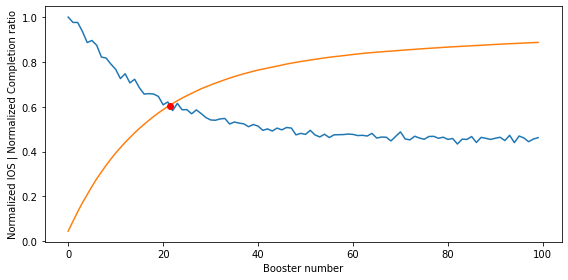

Optimal booster number: [21.5]
Completion ratio: [0.60790164]
IOS ratio: [0.60206661]


In [180]:
# average IOS and normalize to max    
IOSTotal_n = [(i/batchNumber)/(max(IOSTotal)/batchNumber) for i in IOSTotal]
# average completion
completionTotal_n = [i/batchNumber for i in completionTotal]
# average singles value
singlesTotal_n = [i/batchNumber for i in singlesTotal]

xAxis = [i for i in range(boosterBatch)]

#plt.scatter(xAxis, IOSTotal)
#plt.scatter(xAxis, completionBatch)
#plt.ylabel('IOS')
#plt.xlabel('Booster number')
#plt.show()

fig, ax1 = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)

ax1.set_xlabel('Booster number')
ax1.set_ylabel("Normalized IOS | Normalized Completion ratio")
ax1.plot(xAxis, IOSTotal_n, completionTotal_n)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#color = 'tab:red'
#ax2.set_ylabel("Singles Value (€)", color=color)  # we already handled the x-label with ax1
#ax2.plot(xAxis, singlesTotal_n, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

idx = np.argwhere(np.diff(np.sign(np.array(IOSTotal_n) - np.array(completionTotal_n)))).flatten()
plt.plot((np.array(xAxis)[idx+1]+np.array(xAxis)[idx])/2, (np.array(IOSTotal_n)[idx+1]+np.array(IOSTotal_n)[idx])/2, 'ro')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

print('Optimal booster number:', (idx+1+idx)/2)
print('Completion ratio:', (np.array(completionTotal_n)[idx+1]+np.array(completionTotal_n)[idx])/2)
print('IOS ratio:', (np.array(IOSTotal_n)[idx+1]+np.array(IOSTotal_n)[idx])/2)

In [181]:
print(singlesTotal_n)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
